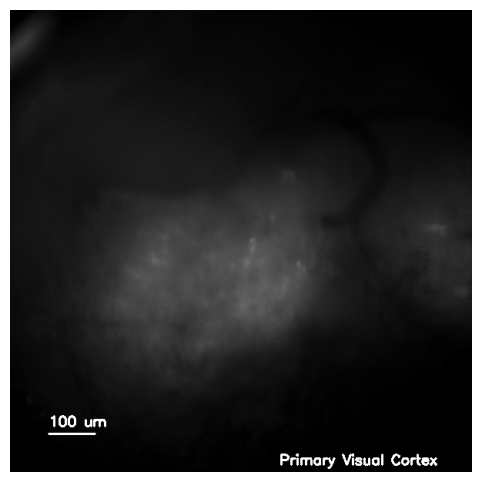

In [8]:
import cv2
import numpy as np

# Path to the video
video_path = '/home/lq53/mir_data/demo_vides_miniscope/240522_V1/0.avi'

# Open the video
cap = cv2.VideoCapture(video_path)

# Define the length of the scale bar in microns and calculate its pixel length
scale_bar_length_um = 100  # Scale bar length in micrometers
pixel_size_um = 1000 / 600  # 1 mm field of view over 600 pixels
scale_bar_length_px = int(scale_bar_length_um / pixel_size_um)

# Function to display a single frame using matplotlib
def display_frame(frame):
    plt.figure(figsize=(6, 6))
    plt.axis('off')  # Turn off the axis
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display in matplotlib
    plt.show()

# Process the video frame by frame
ret, frame = cap.read()
if ret:
    # Add the scale bar to the frame
    start_point = (50, 550)  # Bottom-left position of the scale bar
    end_point = (50 + scale_bar_length_px, 550)  # End of the scale bar
    
    # Draw the scale bar (white line)
    frame_with_bar = cv2.line(frame, start_point, end_point, (255, 255, 255), 2)
    
    # Add a label to the scale bar
    label = f'{scale_bar_length_um} um'
    cv2.putText(frame_with_bar, label, (50, 540), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    note = 'Primary Visual Cortex'
    cv2.putText(frame_with_bar, note, (350, 590), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
    
    # Display the frame
    display_frame(frame_with_bar)

# Release the video capture object
cap.release()

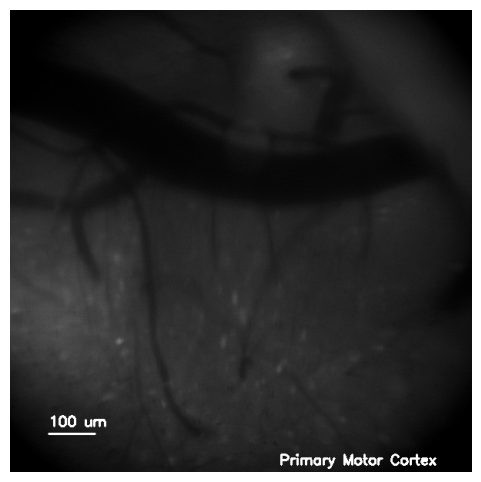

In [7]:
import cv2
import numpy as np

# Path to the video
video_path = '/home/lq53/mir_data/demo_vides_miniscope/240603_PMC/0.avi'

# Open the video
cap = cv2.VideoCapture(video_path)

# Define the length of the scale bar in microns and calculate its pixel length
scale_bar_length_um = 100  # Scale bar length in micrometers
pixel_size_um = 1000 / 600  # 1 mm field of view over 600 pixels
scale_bar_length_px = int(scale_bar_length_um / pixel_size_um)

# Function to display a single frame using matplotlib
def display_frame(frame):
    plt.figure(figsize=(6, 6))
    plt.axis('off')  # Turn off the axis
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display in matplotlib
    plt.show()

# Process the video frame by frame
ret, frame = cap.read()
if ret:
    # Add the scale bar to the frame
    start_point = (50, 550)  # Bottom-left position of the scale bar
    end_point = (50 + scale_bar_length_px, 550)  # End of the scale bar
    
    # Draw the scale bar (white line)
    frame_with_bar = cv2.line(frame, start_point, end_point, (255, 255, 255), 2)
    
    # Add a label to the scale bar
    label = f'{scale_bar_length_um} um'
    cv2.putText(frame_with_bar, label, (50, 540), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    note = 'Primary Motor Cortex'
    cv2.putText(frame_with_bar, note, (350, 590), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
    
    # Display the frame
    display_frame(frame_with_bar)

# Release the video capture object
cap.release()

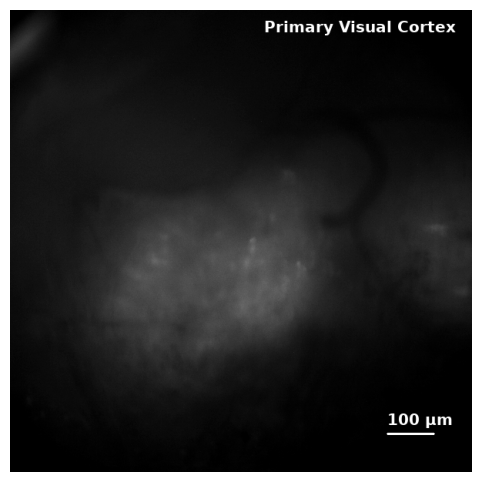

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image

# Path to the video
video_path = '/home/lq53/mir_data/demo_vides_miniscope/240522_V1/0.avi'

# Open the video
cap = cv2.VideoCapture(video_path)

# Define the length of the scale bar in micrometers and calculate its pixel length
scale_bar_length_um = 100  # Scale bar length in micrometers
pixel_size_um = 1000 / 600  # 1 mm field of view over 600 pixels
scale_bar_length_px = int(scale_bar_length_um / pixel_size_um)

# Load a font that supports Unicode (e.g., DejaVuSans, which is widely supported)
font_path = "/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf"  # Adjust this path based on your system
font = ImageFont.truetype(font_path, 20)

# Function to display a single frame using matplotlib
def display_frame(frame):
    plt.figure(figsize=(6, 6))
    plt.axis('off')  # Turn off the axis
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display in matplotlib
    plt.show()

# Process the video frame by frame
ret, frame = cap.read()
if ret:
    # Add the scale bar to the frame (bottom-right corner)
    bar_start_point = (frame.shape[1] - scale_bar_length_px - 50, 550)  # Bottom-right position of the scale bar
    bar_end_point = (frame.shape[1] - 50, 550)  # End of the scale bar
    
    # Draw the scale bar (white line)
    frame_with_bar = cv2.line(frame, bar_start_point, bar_end_point, (255, 255, 255), 2)
    
    # Convert the frame to a PIL image to add the text with Unicode support
    pil_image = Image.fromarray(cv2.cvtColor(frame_with_bar, cv2.COLOR_BGR2RGB))
    draw = ImageDraw.Draw(pil_image)
    
    # Add the scale bar label (shifted above the scale bar)
    label_position = (frame.shape[1] - scale_bar_length_px - 50, 520)  # Position the label above the bar
    label = f'{scale_bar_length_um} μm'
    draw.text(label_position, label, font=font, fill=(255, 255, 255))  # White text for the scale bar label
    
    # Add notes for Primary Visual Cortex and Primary Motor Cortex (just above the image)
    note_visual = 'Primary Visual Cortex'
    note_motor = 'Primary Motor Cortex'
    
    # Adjusted y-coordinate for the labels (just above the image)
    draw.text((330, 10), note_visual, font=font, fill=(255, 255, 255))  # Above the frame  # Just above the image in black
    # draw.text((50, 10), note_motor, font=font, fill=(0, 0, 0))  # Just above the image in black
    
    # Convert the PIL image back to OpenCV format
    frame_with_bar = cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)
    
    # Display the frame with the changes
    display_frame(frame_with_bar)

# Release the video capture object
cap.release()
